In [86]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from pylab import rcParams
rcParams['figure.figsize'] = 6,5

# Read the City and Ride Data
city = pd.read_csv("data/city_data.csv")
ride = pd.read_csv("data/ride_data.csv")



In [87]:
# retrive and convert in to dataframe (city)

city = pd.DataFrame(city)
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [88]:
# retrive and convert in to dataframe (ride)

ride = pd.DataFrame(ride)
ride.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [89]:
# merge two dataframe by cities and get average fare per city.
df = pd.merge(city, ride, on='city', how='left')

df = df.groupby(['city', "type"])
df = pd.DataFrame(round(df.mean(),2))

df = df.reset_index()

df.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12.0,24.64,5.359336e+12
1,Barajasview,Urban,26.0,25.33,4.676968e+12
2,Barronchester,Suburban,11.0,36.42,4.460796e+12
3,Bethanyland,Suburban,22.0,32.96,5.842550e+12
4,Bradshawfurt,Rural,7.0,40.06,3.735294e+12


In [90]:
# Find out total number of rides per city
city_count = ride.copy()

city_count = city_count.groupby('city')['ride_id'].count()
city_count = pd.DataFrame(city_count)

city_count = city_count.reset_index()
city_count = city_count.rename(columns={'ride_id':'Total number of rides'})
city_count.head()

,city,Total number of rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [91]:
# create a final dataframe which contain city type, total number of rides, total drivers and average fare per city.
df = pd.merge(df,city_count, on='city')

df = df.loc[:,['city', 'type', 'Total number of rides', 'driver_count', 'fare',]]

df = pd.DataFrame(df)
df.rename(columns={'city':'City',
                   'type':'Types',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })

,City,Types,Total number of rides,Total drivers,Average fare
0,Amandaburgh,Urban,18,12.0,24.64
1,Barajasview,Urban,22,26.0,25.33
2,Barronchester,Suburban,16,11.0,36.42
3,Bethanyland,Suburban,18,22.0,32.96
4,Bradshawfurt,Rural,10,7.0,40.06
5,Brandonfort,Suburban,19,10.0,35.44
6,Carriemouth,Urban,27,52.0,28.31
7,Christopherfurt,Urban,27,41.0,24.50
8,Colemanland,Suburban,22,23.0,30.89
9,Davidfurt,Suburban,17,23.0,32.00


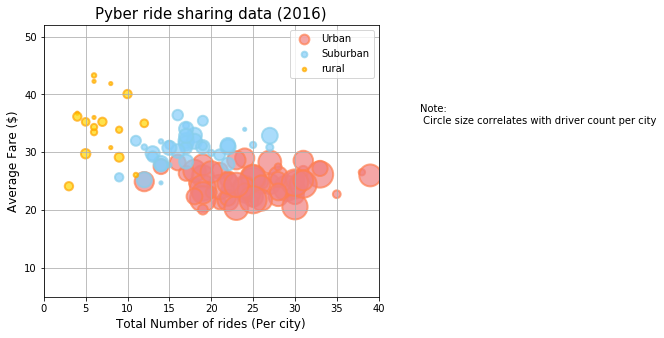

In [92]:
# create scatter plot: X axis: Total number of rides per city, Y axis: Average fares and city type plotted

u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')



x = (df['Total number of rides'] * u) 
y = (df['fare']  *u)
z = (df['driver_count'] *u)

#print(x)
for i in range(len(x)):
    if x[i] == 0:
        x = x.drop([i])
for i in range(len(y)):
    if y[i] == 0:
        y = y.drop([i])
for i in range(len(z)):
    if z[i] == 0:
        z = z.drop([i])

plt.scatter(x, y, alpha=0.7, c='lightcoral', edgecolors='coral', s = z *10, label ='Urban' , linewidth = 2 )


x1 = (df['Total number of rides'] *s)
y1 = (df['fare'] *s)
z1 = (df['driver_count'] *s)
for i in range(len(x1)):
    if x1[i] == 0:
        x1 = x1.drop([i])
        y1 = y1.drop([i])
        z1 = z1.drop([i])

plt.scatter(x1, y1, alpha=0.7, c='lightskyblue', edgecolors='skyblue', s = z1*10, label='Suburban' , linewidth = 2)


x2 = (df['Total number of rides'] *r)
y2 = (df['fare'] *r)
z2 = (df['driver_count'] *r)
for i in range(len(x2)):
    if x2[i] == 0:
        x2 = x2.drop([i])
        y2 = y2.drop([i])
        z2 = z2.drop([i])


plt.scatter(x2, y2, alpha=0.7, c='gold', edgecolors='orange', s = z2 *10, label='rural' , linewidth = 2)
plt.ylim(5, 52)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of rides (Per city)', fontsize = 12)
plt.title("Pyber ride sharing data (2016)", fontsize = 15)
plt.grid()
plt.legend(loc="upper right", scatterpoints=1, fontsize=10, markerscale=0.5)
note = ("Note:\n Circle size correlates with driver count per city")
plt.text(45,35,note)
plt.show()

## Bubble Plot of Ride Sharing Data

In [93]:
# created dataframe which contain total fare by city type and found % of total fare
df1 = pd.merge(city, ride, on='city')
df1 = df1.groupby('type')['fare'].sum()
df1 = pd.DataFrame(df1)
df1['% of total fare'] = df1['fare']/df1['fare'].sum()*100
df1 = df1.reset_index()
df1

,type,fare,% of total fare
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


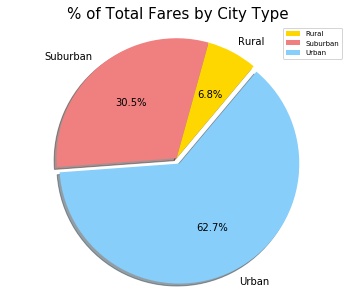

In [94]:
# Pie chart
types = df1['type']
total_fare = df1['% of total fare'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

#Plotted pie chart based on type of city and % of total rides
plt.title('% of Total Fares by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("equal")
plt.show()

## Total Rides by City Type

In [95]:
# created dataframe which contain total number of rides and % of total rides per city type
df2 = df.groupby('type')['Total number of rides'].sum()

df2 = pd.DataFrame(df2)

df2 = df2.reset_index()
df2['% of total rides'] = df2['Total number of rides']/df2['Total number of rides'].sum()* 100
df2


,type,Total number of rides,% of total rides
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


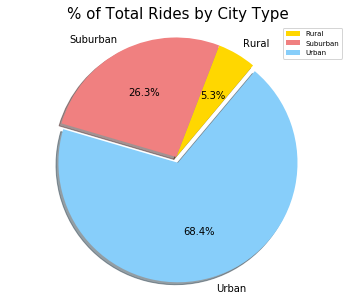

In [96]:
# Calculate Driver Percents
types = df2['type']
total_rides = df2['% of total rides'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

plt.title('% of Total Rides by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("equal")
plt.show()



## Total Drivers by City Type

In [97]:
#Plotted pie chart based on city type and % of total drivers by city 
df3 = df.groupby('type')['driver_count'].sum()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
df3

,type,driver_count,% of total drivers
0,Rural,78.0,2.623613
1,Suburban,490.0,16.481668
2,Urban,2405.0,80.894719


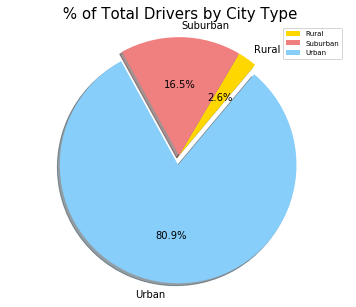

In [98]:
types = df3['type']
total_drivers = df3['% of total drivers'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)
plt.pie(total_drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

plt.title(' % of Total Drivers by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("equal")
plt.show()